In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [3]:
#data = spam and flagged
#spam = y_true (known y)
#flagged = y_pred (predicted y)
spam = [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
           0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
           0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

flagged = [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
               0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [7]:
import numpy as np
y_true = spam.copy()
y_pred = flagged.copy()
#ground for TN,FP,FN,TP
def matrix(y_true, y_pred):
    matr = np.zeros([2,2])
    for item in range(0,len(y_true)):
        if y_true[item] == 0 and y_pred[item] == 0:
            matr[0,0] = matr[0,0]+1
        if y_true[item] == 0 and y_pred[item] == 1:
            matr[0,1] = matr[0,1]+1
        if y_true[item] == 1 and y_pred[item] == 0:
            matr[1,0] = matr[1,0]+1
        if y_true[item] == 1 and y_pred[item] == 1:
            matr[1,1] = matr[1,1]+1
    return matr
cf = matrix(y_true, y_pred)
print(cf)

[[80.  3.]
 [ 6. 11.]]


In [31]:
def accuracy(cf):
    TN = cf[0,0]
    FP = cf[0,1]
    FN = cf[1,0]
    TP = cf[1,1]
    accu = round((TP+TN)/np.sum(cf),2)
    return accu
accuracy = (accuracy(cf))
print("Accuracy:", "\t", accuracy)

def precision(cf):
    TP = cf[1,1]
    FP = cf[0,1]
    prec = round(TP/(TP+FP),2)
    return prec
precision = (precision(cf))
print("Precision", "\t", precision)

def recall(cf):
    TP = cf[1,1]
    FN = cf[1,0]
    rec = round(TP/(TP+FN),2)
    return rec
recall = recall(cf) 
print("Recall:", "\t", recall)

def f_beta_score(precision, recall, beta=1):
    f_score = (1+beta**2) * precision*recall / (beta**2*precision+recall)
    return f_score
f_score = round(f_beta_score(precision, recall, beta=1),2)
print("f-score:", "\t", f_score)

def specificity(cf):
    TN = cf[0,0]
    FP = cf[0,1]
    speci = round(TN/(TN+FP),2)
    return speci
specificity = specificity(cf)
print("Specificity:", "\t", specificity)

Accuracy: 	 0.91
Precision 	 0.79
Recall: 	 0.65
f-score: 	 0.71
Specificity: 	 0.96


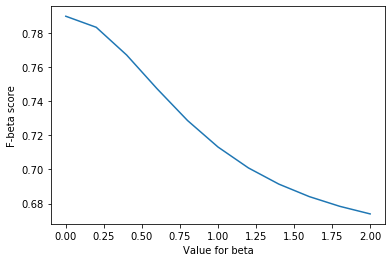

In [32]:
def different_f_scores():
    beta = [x*0.2 for x in range(0,10+1)]
    plt.plot(beta, [f_beta_score(precision, recall, beta=b) for b in beta])
    plt.xlabel("Value for beta")
    plt.ylabel("F-beta score")
different_f_scores()

In [6]:
#other ways to get accuracy
def accuracy(y_true, y_pred):
    y_true_array = np.array(y_true)
    y_pred_array = np.array(y_pred)
    accu = np.mean(y_true_array == y_pred_array)
    return accu
print("Accuracy:", accuracy(y_true, y_pred))

#same but in less efficient way
def accuracy(y_true, y_pred):
    c = 0
    for item in range(0,len(y_true)):
        if y_true[item] == y_pred[item]:
            c+=1
    accu = c/len(y_true)
    return accu
print("Accuracy:", accuracy(y_true, y_pred))

Accuracy: 0.91
Accuracy: 0.91
